In [2]:
%pip install scikit-learn
%pip install pandas
%pip install opencv-python
%pip install pillow
%pip install scikit-image
%pip install ipywidgets
%pip install ace-tools
%pip install matplotlib
%pip install torch
%pip install torchvision

Note: you may need to restart the kernel to use updated packages.
  Using cached pandas-2.2.3-cp310-cp310-macosx_11_0_arm64.whl.metadata (89 kB)
  Using cached pytz-2025.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.1-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.3-cp310-cp310-macosx_11_0_arm64.whl (11.3 MB)
Using cached pytz-2025.1-py2.py3-none-any.whl (507 kB)
Using cached tzdata-2025.1-py2.py3-none-any.whl (346 kB)
Note: you may need to restart the kernel to use updated packages.
  Using cached opencv_python-4.11.0.86-cp37-abi3-macosx_13_0_arm64.whl.metadata (20 kB)
Using cached opencv_python-4.11.0.86-cp37-abi3-macosx_13_0_arm64.whl (37.3 MB)
Note: you may need to restart the kernel to use updated packages.
  Using cached pillow-11.1.0-cp310-cp310-macosx_11_0_arm64.whl.metadata (9.1 kB)
Using cached pillow-11.1.0-cp310-cp310-macosx_11_0_arm64.whl (3.1 MB)
Note: you may need to restart the kernel to use updated packages.
  Using cached scikit_im

In [3]:
import cv2
from PIL import Image, ImageEnhance
from skimage import img_as_float
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import numpy as np
from sklearn.decomposition import PCA
from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim
import skimage.restoration as restoration
from scipy.signal import wiener
from skimage import img_as_float
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.datasets import load_digits
from skimage.feature import hog, local_binary_pattern
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, RocCurveDisplay
from sklearn.preprocessing import LabelBinarizer
from sklearn.decomposition import PCA
import mpl_toolkits.mplot3d
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import tree
from sklearn.model_selection import KFold

# Task 1 - Data Preparation

In [4]:
digits = load_digits()

X = np.array(digits.images)
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

nsamples, nx, ny = X_train.shape
X_train = X_train.reshape((nsamples, nx * ny))
nsamples, nx, ny = X_test.shape
X_test = X_test.reshape((nsamples, nx * ny))

# Task 2 - Classification using kNN

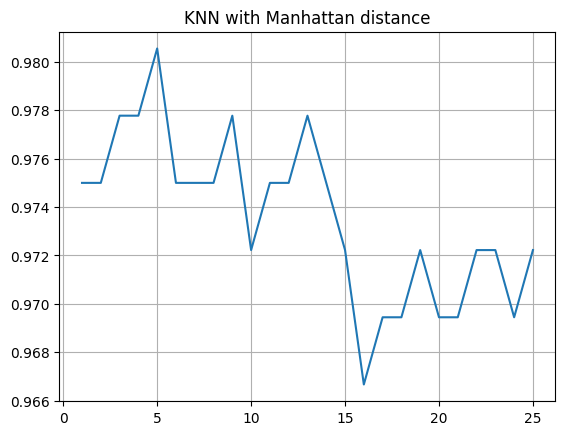

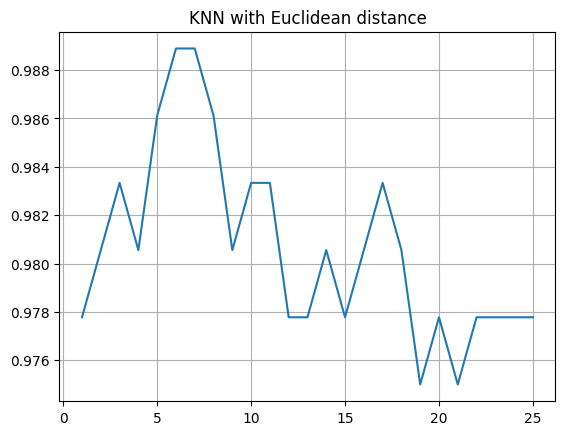

In [6]:
k_range = list(range(1, 26))
mnht_scores = []
ecld_scores = []
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors = i, p = 1)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mnht_scores.append(accuracy_score(y_test, y_pred))
    knn = KNeighborsClassifier(n_neighbors = i, p = 2)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    ecld_scores.append(accuracy_score(y_test, y_pred))
plt.plot(k_range, mnht_scores)
plt.grid(True)
plt.title("KNN with Manhattan distance")
plt.show()
plt.plot(k_range, ecld_scores)
plt.grid(True)
plt.title("KNN with Euclidean distance")
plt.show()

In [8]:
knn = KNeighborsClassifier(n_neighbors = 6, p = 2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred, average = 'macro'))
print("Recall: ", recall_score(y_test, y_pred, average = 'macro'))
print("F-score: ", f1_score(y_test, y_pred, average = 'macro'))

Accuracy:  0.9888888888888889
Precision:  0.9904028005091835
Recall:  0.9899311639549436
F-score:  0.9900986152362391


# Task 3 - Building and Training a Neural Network

# Task 4 - Comparative Analysis of Models